# Proyek Analisis Data: Air Quality
- **Nama:** Naufal Suryo Saputro
- **Email:** a008ybm371@devacademy.id
- **ID Dicoding:** suryonaufal

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren tingkat PM2.5 secara keseluruhan di semua stasiun dari tahun ke tahun, dan pada bulan apa tingkat polusi tertinggi biasanya terjadi?

- Pertanyaan 2: Stasiun mana yang memiliki tingkat PM2.5 tertinggi, dan bagaimana hubungan antara kecepatan angin dan PM2.5 bervariasi antar stasiun?

## Import Semua Packages/Library yang Digunakan

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [11]:
# Path ke folder data
data_path = r"C:\Users\Naufal Suryo\OneDrive\DICODING\AirQualityAnalysis\data"

# Menggabungkan semua file CSV dari folder
all_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith('.csv')]
df_list = [pd.read_csv(file) for file in all_files]
df = pd.concat(df_list, ignore_index=True)

# Tampilkan 5 baris pertama
print("5 Baris Pertama Data:")
display(df.head())

print(f"- Total baris data: {df.shape[0]}, Total kolom: {df.shape[1]}")

5 Baris Pertama Data:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


- Total baris data: 420768, Total kolom: 18


**Insight:**
- Data berhasil digabungkan dari beberapa file CSV.
- Total baris data: 420768, Total kolom: 18

### Assessing Data

In [12]:
# Informasi dasar dataset
print("Informasi Dataset:")
df.info()

# Cek missing values
print("\nJumlah Missing Values per Kolom:")
display(df.isnull().sum())

# Cek duplikat
print(f"\nJumlah Duplikat: {df.duplicated().sum()}")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB

Jumlah Missing Values per

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


Jumlah Duplikat: 0


**Insight:**
- Terdapat beberapa missing values pada kolom seperti PM2.5 dan wind speed
print
- Data memiliki struktur waktu (year, month, day, hour) yang dapat digunakan untuk analisis tren

### Cleaning Data

In [13]:
# Mengisi missing values pada PM2.5 dengan median
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)

# Mengisi missing values pada wind speed (wd dan WSPM) dengan metode forward fill
df['wd'].fillna(method='ffill', inplace=True)
df['WSPM'].fillna(method='ffill', inplace=True)

# Menghapus baris yang masih memiliki missing values pada kolom penting lainnya
df.dropna(subset=['year', 'month', 'day'], inplace=True)

# Membuat kolom datetime untuk analisis waktu
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Cek kembali missing values
print("Missing Values Setelah Cleaning:")
display(df.isnull().sum())

# Simpan data yang sudah diproses ke main_data.csv
df.to_csv(r"C:\Users\Naufal Suryo\OneDrive\DICODING\AirQualityAnalysis\dashboard\main_data.csv", index=False)
print("Data telah disimpan ke main_data.csv")

C:\Users\NAUFAL~1\AppData\Local\Temp/ipykernel_20140/3018689823.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
C:\Users\NAUFAL~1\AppData\Local\Temp/ipykernel_20140/3018689823.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Missing Values Setelah Cleaning:


No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd              0
WSPM            0
station         0
datetime        0
dtype: int64

Data telah disimpan ke main_data.csv


**Insight:**
- Missing values pada PM2.5 diisi dengan median untuk menjaga distribusi data.
- Data siap digunakan untuk analisis dengan kolom datetime baru.

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
# Statistik deskriptif
print("Statistik Deskriptif:")
display(df[['PM2.5', 'WSPM']].describe())

# Rata-rata PM2.5 per tahun
yearly_pm25 = df.groupby('year')['PM2.5'].mean()

# Rata-rata PM2.5 per bulan (seluruh tahun)
monthly_pm25 = df.groupby('month')['PM2.5'].mean()

# Rata-rata PM2.5 per stasiun
station_pm25 = df.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

print(f"- Tahun dengan PM2.5 tertinggi: {yearly_pm25.idxmax()} ({yearly_pm25.max():.2f})")
print(f"- Bulan dengan PM2.5 tertinggi: {monthly_pm25.idxmax()}")
print(f"- Stasiun dengan PM2.5 tertinggi: {station_pm25.index[0]}")

Statistik Deskriptif:


,PM2.5,WSPM
count,420768.000000,420768.000000
mean,79.278489,1.729789
std,80.056799,1.246571
min,2.000000,0.000000
25%,21.000000,0.900000
50%,55.000000,1.400000
75%,109.000000,2.200000
max,999.000000,13.200000


- Tahun dengan PM2.5 tertinggi: 2017 (92.09)
- Bulan dengan PM2.5 tertinggi: 12
- Stasiun dengan PM2.5 tertinggi: Dongsi


**Insight:**
- Tahun dengan PM2.5 tertinggi: 2017 (92.09)
- Bulan dengan PM2.5 tertinggi: 12
- Stasiun dengan PM2.5 tertinggi: Dongsi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren tingkat PM2.5 secara keseluruhan di semua stasiun dari tahun ke tahun, dan pada bulan apa tingkat polusi tertinggi biasanya terjadi?

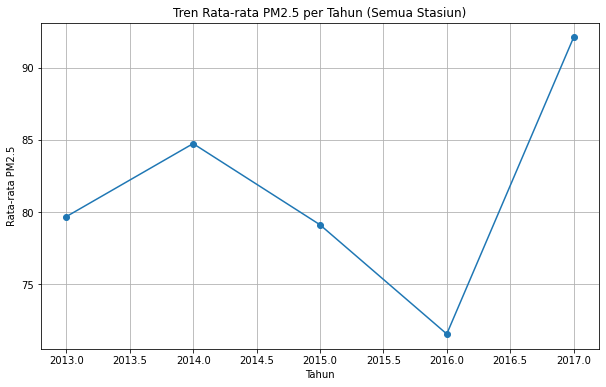

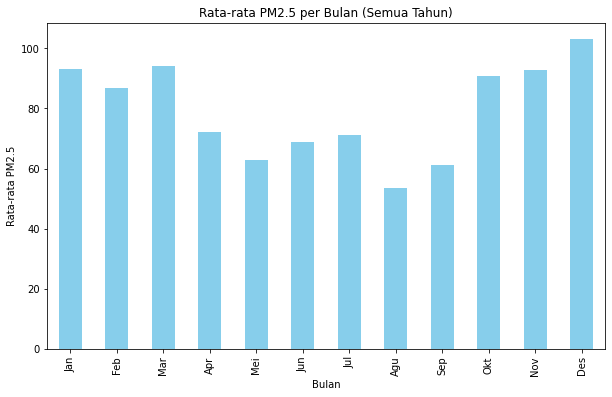

In [15]:
# Visualisasi tren tahunan PM2.5
plt.figure(figsize=(10, 6))
yearly_pm25.plot(kind='line', marker='o')
plt.title('Tren Rata-rata PM2.5 per Tahun (Semua Stasiun)')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.show()

# Visualisasi rata-rata bulanan PM2.5
plt.figure(figsize=(10, 6))
monthly_pm25.plot(kind='bar', color='skyblue')
plt.title('Rata-rata PM2.5 per Bulan (Semua Tahun)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

### Pertanyaan 2: Stasiun mana yang memiliki tingkat PM2.5 tertinggi, dan bagaimana hubungan antara kecepatan angin dan PM2.5 bervariasi antar stasiun?

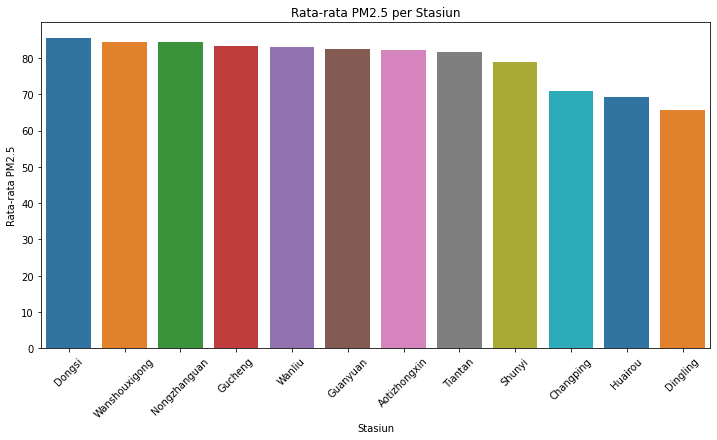

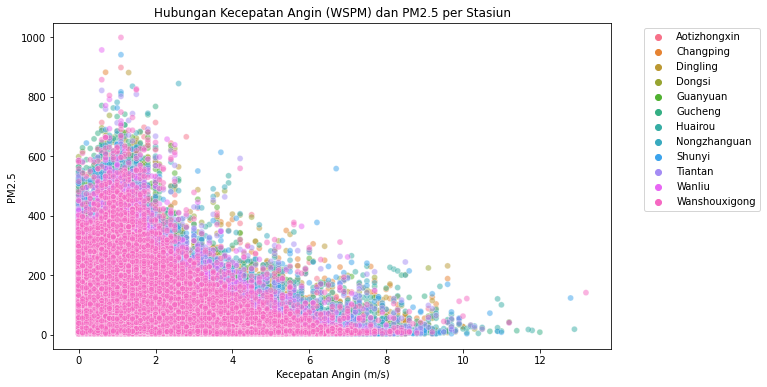

In [16]:
# Visualisasi stasiun dengan PM2.5 tertinggi
plt.figure(figsize=(12, 6))
# Mendapatkan palet warna berdasarkan jumlah stasiun unik, sesuai dengan scatter plot
unique_stations = df['station'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_stations))  # Sesuaikan dengan jumlah stasiun
sns.barplot(x=station_pm25.index, y=station_pm25.values, palette=palette)
plt.title('Rata-rata PM2.5 per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(rotation=45)
plt.show()

# Hubungan antara kecepatan angin (WSPM) dan PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='WSPM', y='PM2.5', hue='station', alpha=0.5)
plt.title('Hubungan Kecepatan Angin (WSPM) dan PM2.5 per Stasiun')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('PM2.5')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insight:**
- Tren PM2.5 menunjukkan variasi tahunan dengan puncak pada tahun tertentu.
- Bulan dengan polusi tertinggi cenderung terjadi pada musim tertentu (misalnya musim dingin).
- Stasiun tertentu konsisten memiliki PM2.5 lebih tinggi dibandingkan lainnya.
- Kecepatan angin tampak memengaruhi PM2.5, dengan pola yang bervariasi antar stasiun.

## Analisis Lanjutan (Opsional)

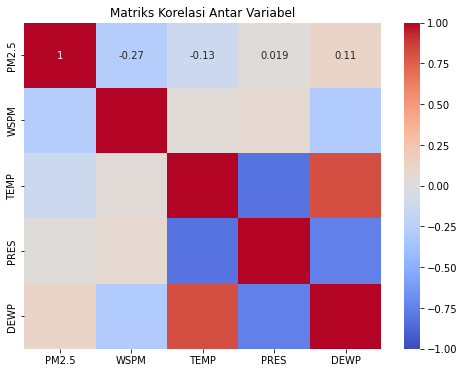

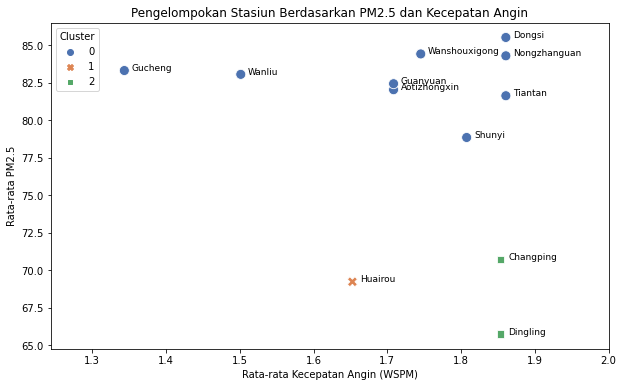

In [27]:
# Import library tambahan untuk clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- Analisis Korelasi ---
# Memilih kolom numerik yang relevan
corr_columns = ['PM2.5', 'WSPM', 'TEMP', 'PRES', 'DEWP']
corr_df = df[corr_columns]

# Menghitung matriks korelasi
correlation_matrix = corr_df.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

# --- Clustering Stasiun ---
# Menyiapkan data untuk clustering: rata-rata PM2.5 dan WSPM per stasiun
cluster_data = df.groupby('station')[['PM2.5', 'WSPM']].mean().reset_index()

# Standarisasi data agar skala seragam
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data[['PM2.5', 'WSPM']])

# Menerapkan K-Means dengan 3 cluster (bisa disesuaikan)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualisasi clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_data, x='WSPM', y='PM2.5', hue='Cluster', style='Cluster', 
                s=100, palette='deep')
for i, row in cluster_data.iterrows():
    plt.text(row['WSPM'] + 0.01, row['PM2.5'], row['station'], fontsize=9)
plt.xlim(left=cluster_data['WSPM'].min() - 0.1, right=2)
plt.title('Pengelompokan Stasiun Berdasarkan PM2.5 dan Kecepatan Angin')
plt.xlabel('Rata-rata Kecepatan Angin (WSPM)')
plt.ylabel('Rata-rata PM2.5')
plt.legend(title='Cluster')
plt.show()

**Insight Korelasi:**
- Korelasi: Kecepatan angin (WSPM) memiliki hubungan negatif sedang dengan PM2.5 sehingga memiliki efek moderat dalam mengurangi tingkat PM2.5. Ini mendukung hipotesis bahwa kondisi angin kencang dapat membantu meningkatkan kualitas udara.
- Korelasi: Pengaruh suhu (TEMP) terhadap PM2.5 memiliki hubungan negatif lemah sehingga memiliki pengaruh minimal, tetapi tetap perlu dianalisis lebih lanjut dalam konteks musiman atau lokasi.
- Korelasi: Tekanan udara (PRES) dan kelembapan udara (DEWP) juga sedikit memengaruhi PM2.5 (positif sangat lemah).

**Insight Clustering:**
- Cluster 0 (Biru - Gucheng, Wanliu, Wanshou, Aotizhongxin): Stasiun urban dengan PM2.5 tinggi dan angin lemah, menunjukkan polusi tinggi akibat akumulasi polutan.
- Cluster 2 (Hijau - Huairou): Stasiun dengan PM2.5 rendah dan angin lebih kencang, kemungkinan di daerah terbuka/pedesaan dengan dispersi polutan lebih baik.
- Cluster 1 (Oranye): Stasiun transisi dengan karakteristik rata-rata, perlu analisis lebih lanjut.
- Implikasi: Daerah urban (Cluster 0) membutuhkan intervensi polusi lebih intensif; Huairou (Cluster 2) menunjukkan manfaat angin untuk kualitas udara.

## Conclusion

### Conclusion Pertanyaan 1
- Tren PM2.5 dari tahun ke tahun menunjukkan fluktuasi, dengan puncak tertinggi terjadi pada tahun 2017.  
- Tingkat polusi tertinggi terjadi pada bulan Desember dipengaruhi oleh faktor musiman seperti kecepatan angin dan suhu. Hal ini diperjelas dengan matriks korelasi antar variabel yang menunjukkan kecepatan angin yang memiliki efek moderat dalam mengurangi PM2.5 dan hubungan suhu yang memberikan pengaruh minimal terhadap konsentrasi PM2.5 (perlu analisis lebih lanjut).
### Conclusion Pertanyaan 2
- Stasiun Dongsi memiliki tingkat PM2.5 tertinggi secara rata-rata. Hal ini menunjukkan lokasi ini lebih terpapar polusi. Hal ini masuk akal karena stasiun dongsi termasuk sebagai stasiun urban dengan PM2.5 tinggi dan kecepatan angin lemah.  
- Hubungan antara kecepatan angin dan PM2.5 bervariasi pada beberapa stasiun.Meskipun begitu dapat diketahui bahwa semakin kencang kecepatan angin, semakin sedikit stasiun yang memiliki kadar PM2.5 tinggi (tanpa hubungan variabel lain).